### Student Information
Name: 李忠翰

Student ID: 109062595

GitHub ID: spencerlii

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

------------------------------------------------------------------------------------------------

1. First: do the take home exercises in the DM2020-Lab1-Master Repo. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade

In [150]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

    
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
#df['age']=df['age'].apply(lambda x: x+3)
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



>>>Exercise 2 (take home): Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [2]:
# Answer here
#Choose category=1 and category=0 data
X.query('category==1| category==0')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
...                                                 ...       ...   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
12      alt.atheism  
13      alt.atheism  
...             ...  
2237    alt.atheism  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  
2250    alt.atheism  

[1064 rows x 3 columns]

>>>Exercise 5 (take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
print(np.nan)
print(type(None))
print(type(''))

nan
<class 'NoneType'>
<class 'str'>


#Answer here

A is a nan that returned by munpy function, B has totally nothing, E is a NoneType in python; Therefore, A,B,E is real null.
However, C,D,F are string that call NaN, None and empty string. They are string but null.

>>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000) #random state

#Answer here      

X_sample randomly pick 1000 data in X, so the size changed to 1000. Also the new order is not sorted.

>>> Exercise 8 (take home):We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

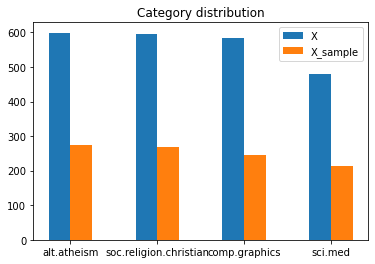

In [7]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(categories, X.category_name.value_counts(), label='X', align = "edge", width=-0.25)
plt.bar(categories, X_sample.category_name.value_counts(), label='X_sample', align = "edge", width=0.25)
plt.title('Category distribution')  
plt.legend()  


>>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [9]:
# Answer here
ind = list(X_counts[4, 1:100].toarray()[0]).index(1) + 1
count_vect.get_feature_names()[ind]

'01'

>>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#Answer here   
I will first sum up the frequency of each term with all documents, and by using WordCloud so that people can easily know how frequent each word appears.

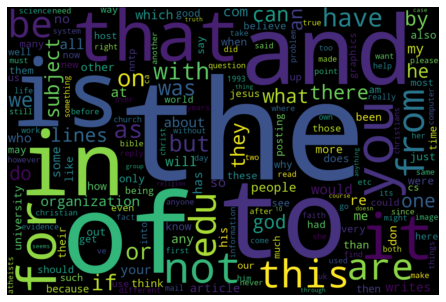

In [10]:
from wordcloud import WordCloud
from collections import Counter
def wordCloud(counter):
    wc = WordCloud(width = 1200, height = 800,
                  background_color = "black")
    
    wc.generate_from_frequencies(counter)
    
    fig = plt.figure(figsize = (6, 4))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    
    
tfq = []
for j in range(0,X_counts.shape[1]):
    tfq.append(sum(X_counts[:,j].toarray()))
    
feature_names = count_vect.get_feature_names()

counter = Counter()
for wrd, fq in zip(feature_names, tfq):
    counter[wrd] = fq[0]
    
wordCloud(counter)

>>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

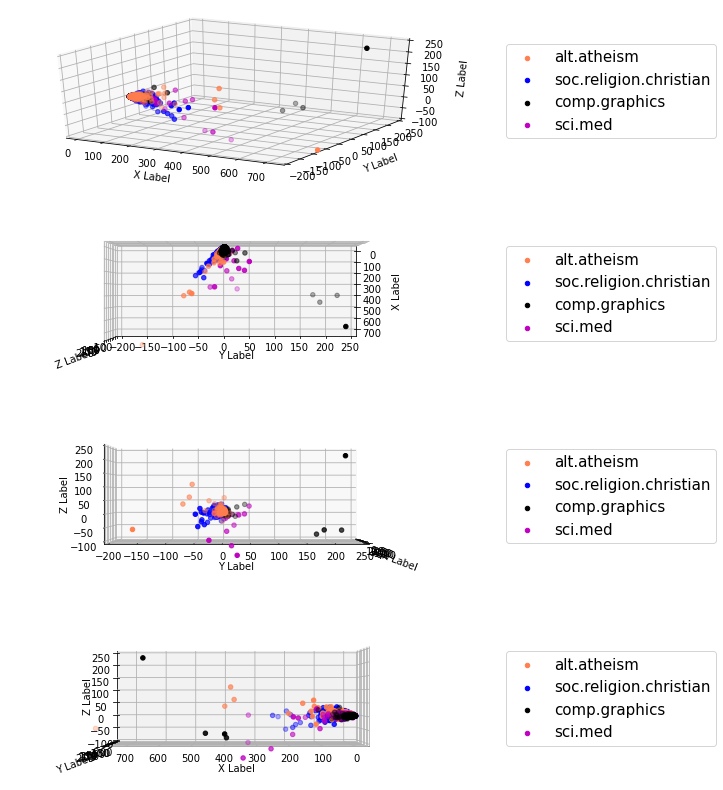

In [11]:
# Answer here
from sklearn.decomposition import PCA
import seaborn as sborn
from mpl_toolkits.mplot3d import Axes3D 
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

sborn.reset_orig()

fig = plt.figure(figsize = (8,18))
figIdx = 0

elevAng = [15, 90, 0, 0]
axisAng = [325, 0, 0, 90 ]

row = len(axisAng)

for i in range(row):
    figIdx += 1
    ax = fig.add_subplot(row + 1, 1, figIdx, projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c = c, marker='o',label = category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.set_xlim3d(-25, 750)
    ax.set_ylim3d(-200,250)
    ax.set_zlim3d(-100,250)

    ax.legend(loc = 'center left', bbox_to_anchor = (1.1, 0.5), fontsize=15)
    if i > 0:
        ax.view_init(elev = elevAng[i], azim = axisAng[i])

plt.show()

>>> Exercise 13 (take home): 
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [12]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [13]:
# Answer here
import plotly.graph_objects as go

layout = go.Layout(xaxis={'type': 'category'})
data = [go.Bar(
            x=count_vect.get_feature_names()[:300],
            y=term_frequencies[:300],
            text=term_frequencies[:300],
            textposition='auto',
        )]
fig = go.Figure(data, layout)


fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=10))
fig.update_layout(autosize=False)
fig.show()

>>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

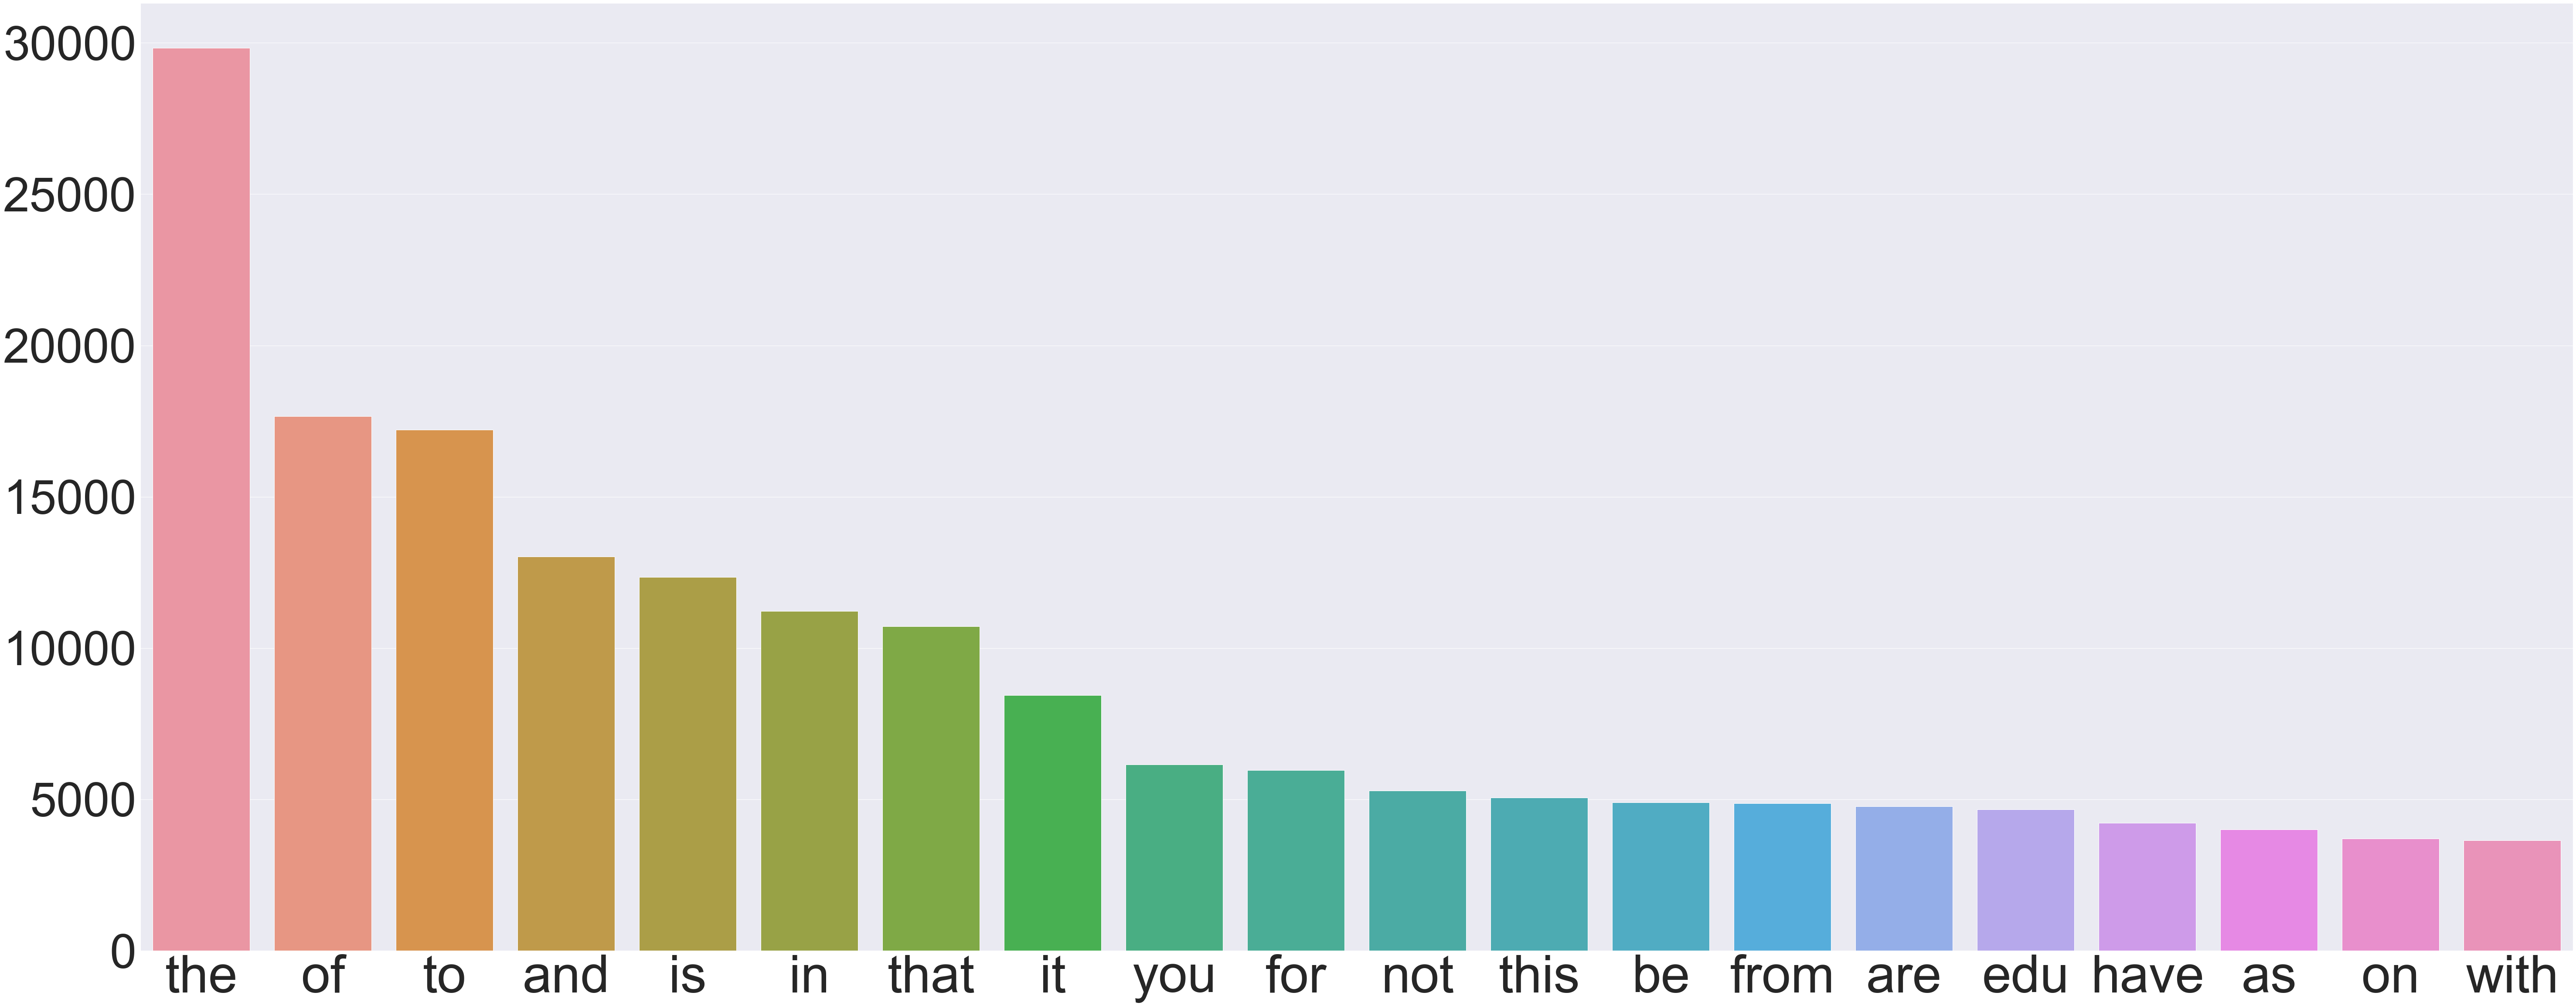

In [14]:
# Answer here
# only print out some most frequent word.
df = pd.DataFrame({'Word' : count_vect.get_feature_names(),'Frequence'  : term_frequencies})
df.sort_values(by=['Frequence'], inplace=True, ascending=False)

wd = df['Word'].values
fre = df['Frequence'].values

sborn.set(font_scale=10)

plt.subplots(figsize=(100, 40))
g = sborn.barplot(x = wd.tolist()[:20], 
                y = fre.tolist()[:20])
g.set_xticklabels(wd.tolist()[:20], fontsize=120);

>>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

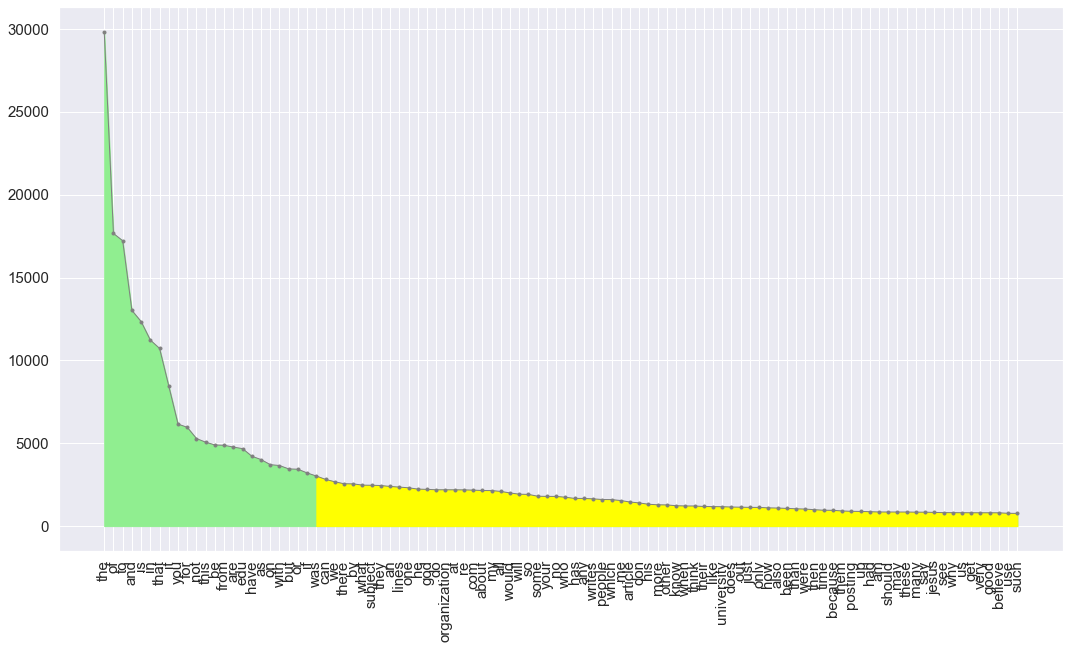

In [15]:
# Answer here
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot()

ax.plot(wd.tolist()[:100], fre.tolist()[:100], marker='.', color = 'grey', lw = 1)

ax.xaxis.set_tick_params(labelsize=15, rotation=90)
ax.yaxis.set_tick_params(labelsize=15)

W = wd.tolist()[:100]
F = fre.tolist()[:100]

d = fre[:100].mean()
ax.fill_between(W, F, color = 'lightgreen', interpolate = True)
ax.fill_between(W, F, where = F <= d, color='yellow', interpolate = True)

plt.show()

>>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [16]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
print(mlb.transform(X['category_name']))
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

------------------------------------------------------------------------------------------------

Second: follow the same process from the DM2020-Lab1-Master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade. 

Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.           

You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.


In [54]:
#read the txt file into two list, sentences and scores
'''
=======
Format:
=======
sentence \t score \n


=======
Details:
=======
Score is either 1 (for positive) or 0 (for negative)
'''

datafile = ['sentiment labelled sentences/amazon_cells_labelled.txt', 'sentiment labelled sentences/imdb_labelled.txt', 'sentiment labelled sentences/yelp_labelled.txt']
sentences, scores = [], []
for fl in datafile:
    x, y = dmh.rdtxt(fl)
    sentences += x
    scores += y
    
scores = [int(i) for i in scores]
print(sentences[0:20])
print(scores[0:20])

['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.', 'He was very impressed when going from the original battery to the extended battery.', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.', 'Very good quality though', 'The design is very odd, as the ear "clip" is not very comfortable at all.', 'Highly recommend for any one who has a blue tooth phone.', 'I advise EVERYONE DO NOT BE FOO

In [55]:
#create pandas dataframe

df_newdata = pd.DataFrame(list(zip(sentences, scores)), columns = ['Sentences', 'Scores'])

print(df_newdata.shape)
df_newdata[0:25]

(3000, 2)


Sentences  Scores
0   So there is no way for me to plug it in here i...       0
1                         Good case, Excellent value.       1
2                              Great for the jawbone.       1
3   Tied to charger for conversations lasting more...       0
4                                   The mic is great.       1
5   I have to jiggle the plug to get it to line up...       0
6   If you have several dozen or several hundred c...       0
7         If you are Razr owner...you must have this!       1
8                 Needless to say, I wasted my money.       0
9                    What a waste of money and time!.       0
10                    And the sound quality is great.       1
11  He was very impressed when going from the orig...       1
12  If the two were seperated by a mere 5+ ft I st...       0
13                           Very good quality though       1
14  The design is very odd, as the ear "clip" is n...       0
15  Highly recommend for any one who has a blue to...       1
16                I advise EVERYONE DO NOT BE FOOLED!       0
17                                   So Far So Good!.       1
18                                      Works great!.       1
19  It clicks into place in a way that makes you w...       0
20  I went on Motorola's website and followed all ...       0
21  I bought this to use with my Kindle Fire and a...       1
22           The commercials are the most misleading.       0
23  I have yet to run this new battery below two b...       1
24  I bought it for my mother and she had a proble...       0

In [56]:
#check if there is any empty data
print(df_newdata.isnull().sum())
print('1. ')
print(df_newdata[df_newdata['Sentences']==''])
print('2. ')
print(df_newdata[df_newdata['Sentences']=='NaN'])
print('3. ')
print(df_newdata[df_newdata['Sentences']=='None'])

Sentences    0
Scores       0
dtype: int64
1. 
Empty DataFrame
Columns: [Sentences, Scores]
Index: []
2. 
Empty DataFrame
Columns: [Sentences, Scores]
Index: []
3. 
Empty DataFrame
Columns: [Sentences, Scores]
Index: []


In [57]:
#check if there is any duplicated data
print(df_newdata.duplicated().sum())

17


In [58]:
#drop duplicated data
df_newdata.drop_duplicates(inplace = True, ignore_index = True)
print(len(df_newdata))

2983


In [59]:
#sampling 
df_newdata_sample = df_newdata.sample(n = 1000)
print(len(df_newdata_sample))
print(df_newdata_sample[:15])

1000
                                              Sentences  Scores
979   The text messaging feature is really tricky to...       0
1614                              Avoid at all costs.         0
2446                                We loved the place.       1
2322                            Great service and food.       1
140                                       What a waste.       0
55    Everything about it is fine and reasonable for...       1
893   I love being able to use one headset for both ...       1
1560  To sum the film up, "Breeders" is a terrible, ...       0
1718        ) some great music, and terrific scenery.         1
1804  You will leave the theater wanting to go out a...       1
2437    I don't think we'll be going back anytime soon.       0
671          Can't upload ringtones from a third party.       0
2633                                    What a mistake.       0
708                                       Poor quality.       0
2173  The food sucked, which we exp

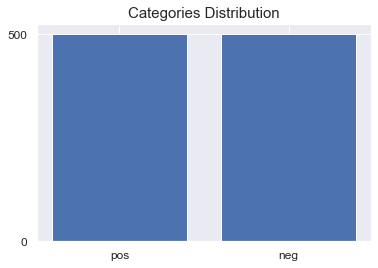

In [60]:
#plot the bar figure
import matplotlib.pyplot as plt

plt.bar(['pos', 'neg'], df_newdata_sample.Scores.value_counts())
plt.title('Categories Distribution', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [61]:
#Feature Creation
import nltk
df_newdata['unigrams'] = df_newdata['Sentences'].apply(lambda x: dmh.tokenize_text(x))
df_newdata['unigrams'][:15]

0     [So, there, is, no, way, for, me, to, plug, it...
1                  [Good, case, ,, Excellent, value, .]
2                         [Great, for, the, jawbone, .]
3     [Tied, to, charger, for, conversations, lastin...
4                              [The, mic, is, great, .]
5     [I, have, to, jiggle, the, plug, to, get, it, ...
6     [If, you, have, several, dozen, or, several, h...
7     [If, you, are, Razr, owner, ..., you, must, ha...
8       [Needless, to, say, ,, I, wasted, my, money, .]
9          [What, a, waste, of, money, and, time, !, .]
10             [And, the, sound, quality, is, great, .]
11    [He, was, very, impressed, when, going, from, ...
12    [If, the, two, were, seperated, by, a, mere, 5...
13                        [Very, good, quality, though]
14    [The, design, is, very, odd, ,, as, the, ear, ...
Name: unigrams, dtype: object

In [75]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
newdata_counts = count_vect.fit_transform(df_newdata.Sentences)
print(newdata_counts.shape)
count_vect.get_feature_names()[0:10]

(2983, 5155)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [76]:
newdata_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [77]:
#find newdata_counts 4 first 1
ind = list(newdata_counts[3, 1:100].toarray()[0]).index(1) + 1
count_vect.get_feature_names()[ind]

'45'

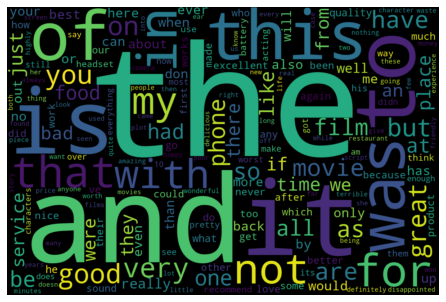

In [66]:
#show the word cloud
from wordcloud import WordCloud
from collections import Counter
import seaborn as sborn

def wordCloud(counter):
    wc = WordCloud(width = 1200, height = 800,
                  background_color = "black")
    
    wc.generate_from_frequencies(counter)
    
    fig = plt.figure(figsize = (6, 4))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    
term_frequencies = []
for j in range(0,newdata_counts.shape[1]):
    term_frequencies.append(sum(newdata_counts[:,j].toarray()))

feature_names = count_vect.get_feature_names()

counter = Counter()
for wrd, fq in zip(feature_names, term_frequencies):
    counter[wrd] = fq[0]

wordCloud(counter)

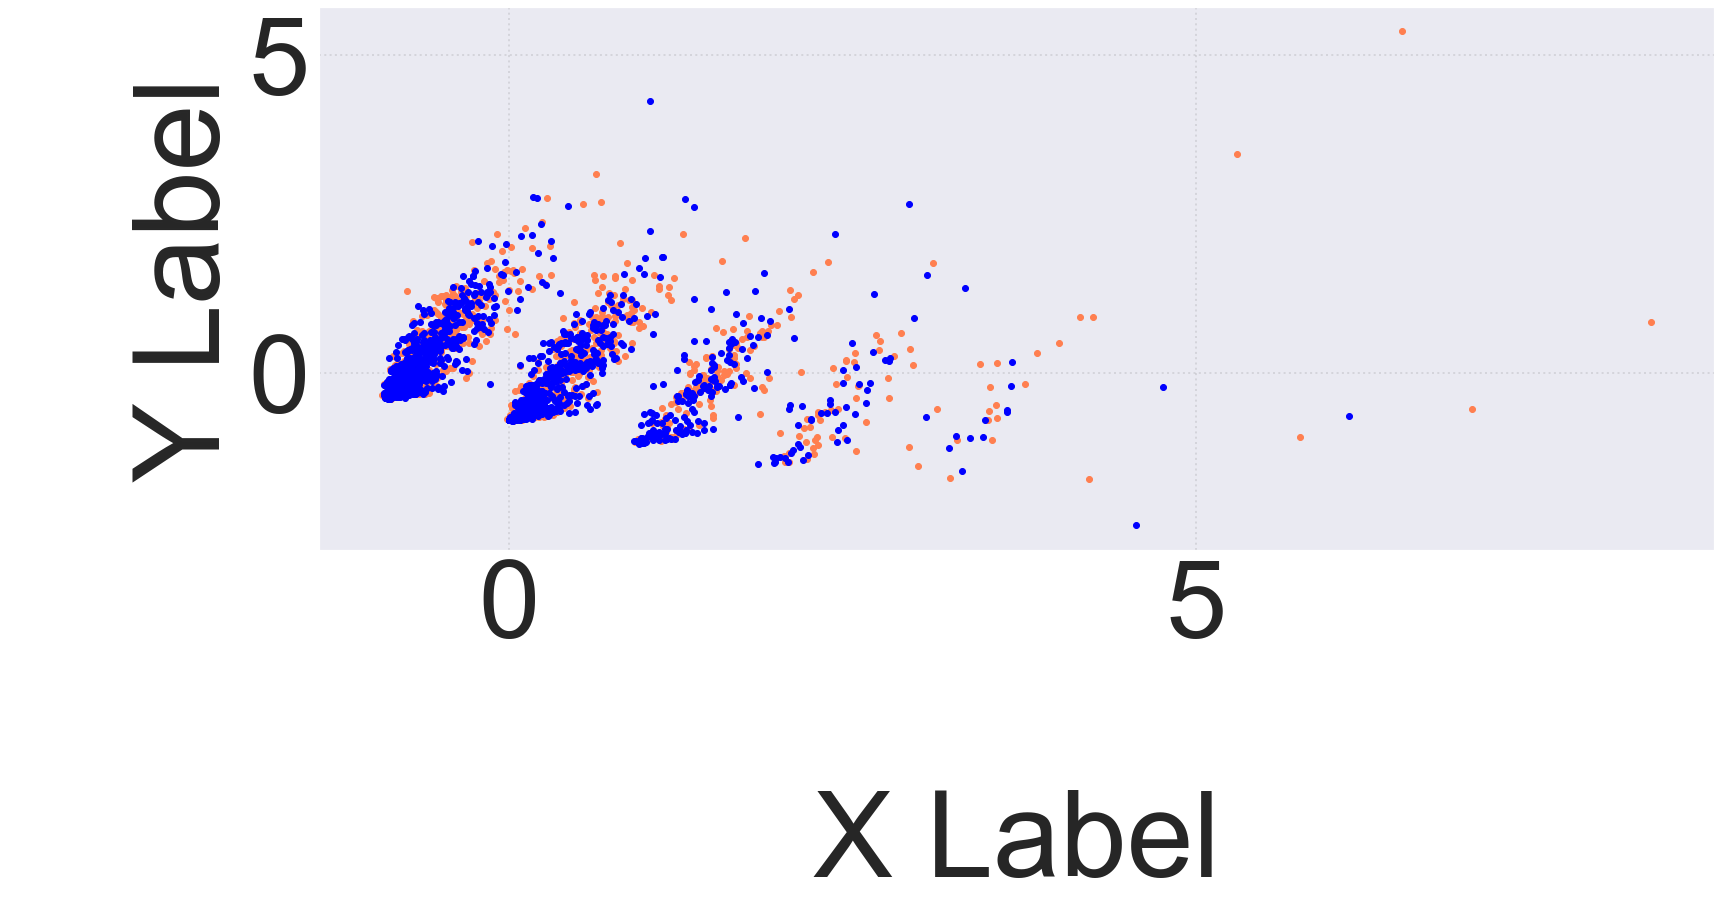

In [87]:
from sklearn.decomposition import PCA
newdata_reduced = PCA(n_components = 2).fit_transform(newdata_counts.toarray())

categories = [1, 0]
label = ['positive', 'negative']
colors = ['green', 'red']

# plot 2D
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = newdata_reduced[df_newdata['Scores'] == category].T[0]
    ys = newdata_reduced[df_newdata['Scores'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

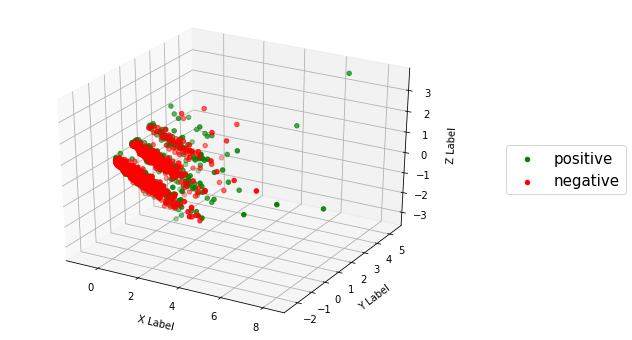

In [90]:
# plot 3D
sborn.reset_orig()

newdata_reduced = PCA(n_components = 3).fit_transform(newdata_counts.toarray())

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection='3d')

for c, category, lbl in zip(colors, categories, label):
    xs = newdata_reduced[df_newdata['Scores'] == category].T[0]
    ys = newdata_reduced[df_newdata['Scores'] == category].T[1]
    zs = newdata_reduced[df_newdata['Scores'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o',label = lbl)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#ax.set_xlim3d(-25, 750)
#ax.set_ylim3d(-200,250)
#ax.set_zlim3d(-100,250)
ax.legend(loc = 'center left', bbox_to_anchor = (1.1, 0.5), fontsize=15)

plt.show()

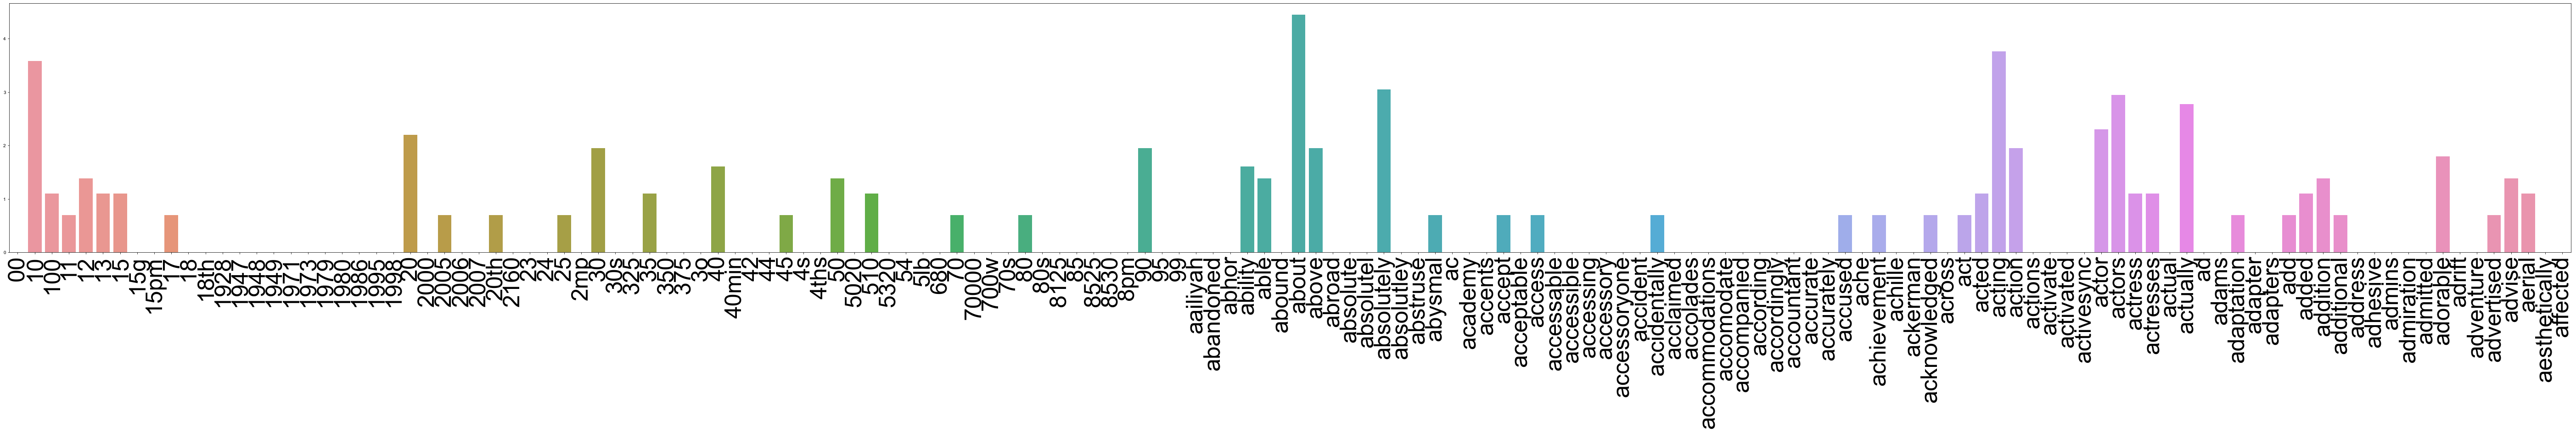

In [91]:
#Atrribute Transformation / Aggregation

#show the frequency log
term_frequencies = np.asarray(newdata_counts.sum(axis=0))[0]

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sborn.barplot(x=count_vect.get_feature_names()[:150],
                y=term_frequencies_log[:150])

sborn.set(font_scale=2)

g.set_xticklabels(count_vect.get_feature_names()[:150], fontsize=50);
g.set_xticklabels(count_vect.get_feature_names()[:150], rotation = 90);

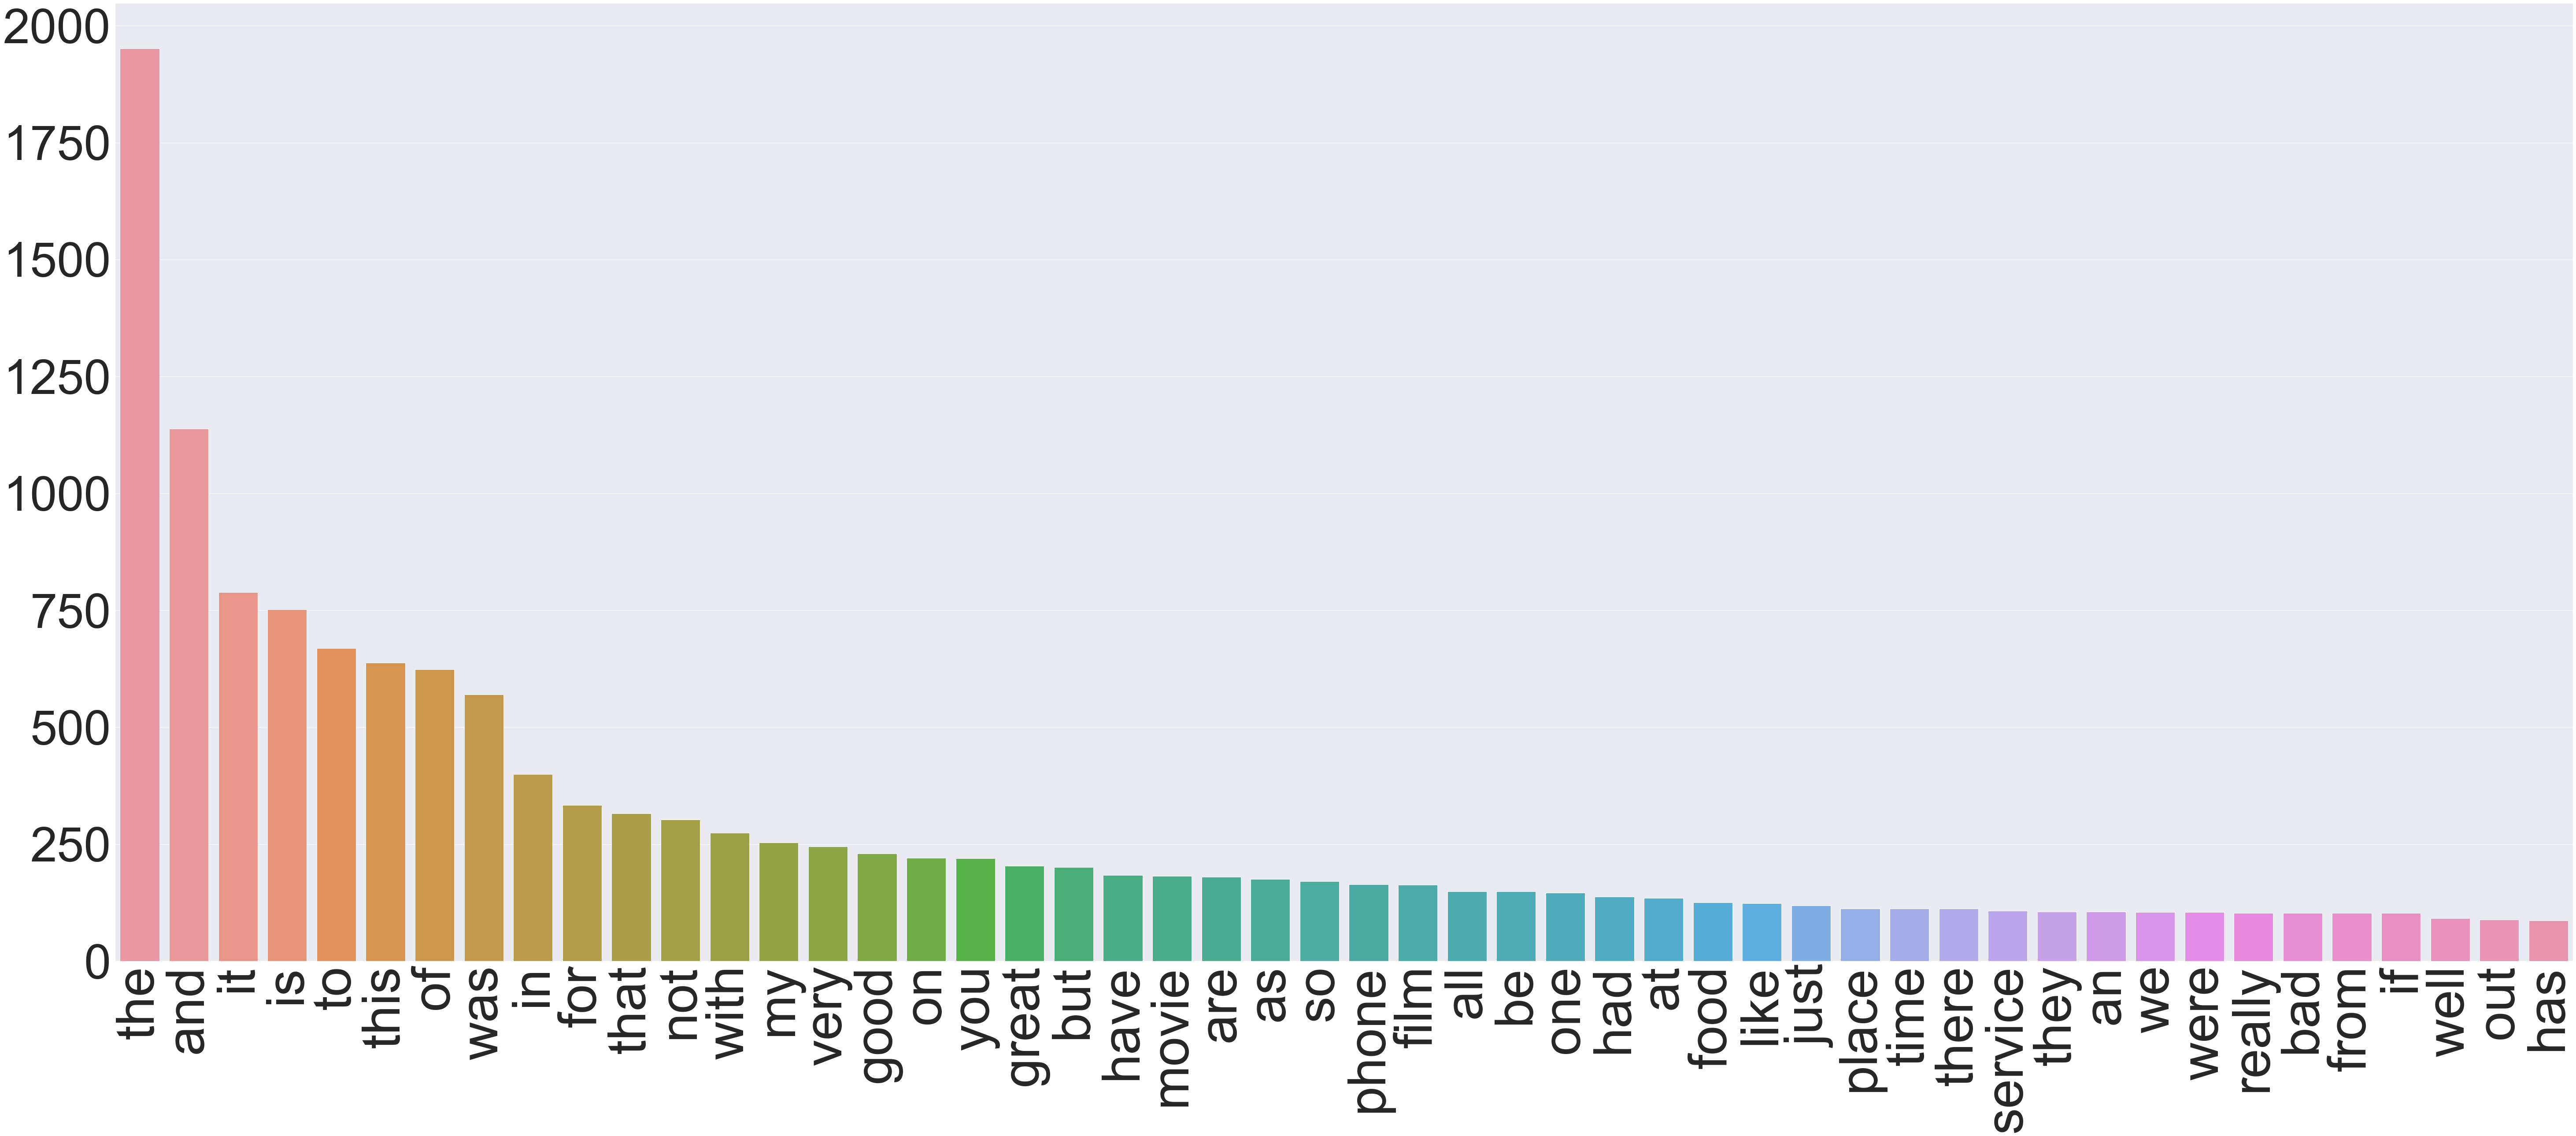

In [92]:
df_words_cnt = pd.DataFrame({'Words' : count_vect.get_feature_names(),
                  'Frequency'  : term_frequencies})

df_words_cnt.sort_values(by=['Frequency'], inplace=True, ascending=False)

Words = df_words_cnt['Words'].values
Frequency = df_words_cnt['Frequency'].values

sborn.set(font_scale=10)

plt.subplots(figsize=(100, 40))
g = sborn.barplot(x = Words.tolist()[:50], 
                y = Frequency.tolist()[:50])
g.set_xticklabels(Words.tolist()[:50], fontsize=120);
g.set_xticklabels(Words.tolist()[:50], rotation=90);

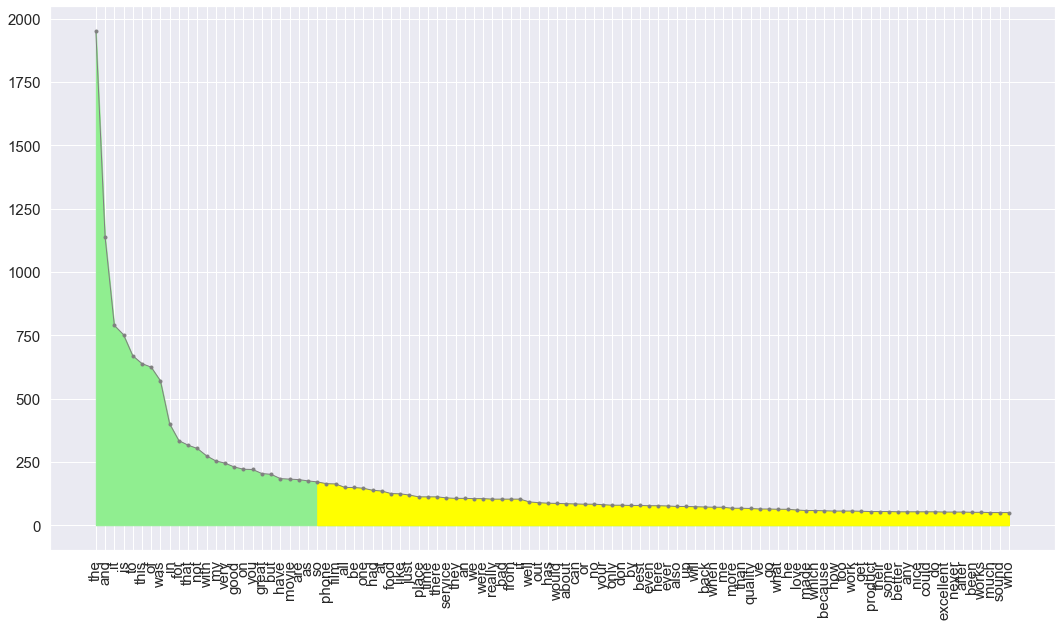

In [93]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot()

ax.plot(Words.tolist()[:100], Frequency.tolist()[:100], marker='.', color = 'grey', lw = 1)

ax.xaxis.set_tick_params(labelsize=15, rotation=90)
ax.yaxis.set_tick_params(labelsize=15)

T = Words.tolist()[:100]
F = Frequency.tolist()[:100]

d = Frequency[:100].mean()
ax.fill_between(T, F, color = 'lightgreen', interpolate = True)
ax.fill_between(T, F, where = F <= d, color='yellow', interpolate = True)

plt.show()

In [98]:
#Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df_newdata.Scores)
df_newdata['bin_category'] = mlb.transform(df_newdata['Scores']).tolist()
df_newdata[0:9]

Sentences  Scores  \
0  So there is no way for me to plug it in here i...       0   
1                        Good case, Excellent value.       1   
2                             Great for the jawbone.       1   
3  Tied to charger for conversations lasting more...       0   
4                                  The mic is great.       1   
5  I have to jiggle the plug to get it to line up...       0   
6  If you have several dozen or several hundred c...       0   
7        If you are Razr owner...you must have this!       1   
8                Needless to say, I wasted my money.       0   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

In [101]:
#Data Exploration
document_to_transform_1 = []
random_record_1 = df_newdata.iloc[50]
random_record_1 = random_record_1['Sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_newdata.iloc[100]
random_record_2 = random_record_2['Sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_newdata.iloc[150]
random_record_3 = random_record_3['Sentences']
document_to_transform_3.append(random_record_3)


print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [102]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [103]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


------------------------------------------------------------------------------------------------

Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.

Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [136]:
#Generate TF-IDF features from the tokens of each text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

sentences = df_newdata['Sentences'].values

document_matrix = vectorizer.fit_transform(sentences)

In [137]:
def Plot_Confusion_Matrix(confmat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.show()
    
def sort_features_by_tfidf_score_desc(featmatrix):
    tuples = zip(featmatrix.col, featmatrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def shows_topN_from_vector(feature_names, sorted_items, topn=10):  
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    importance_feat= {}
    for idx in range(len(feature_vals)):
        importance_feat[feature_vals[idx]]=score_vals[idx]
    
    return importance_feat

In [138]:
feature_names = count_vect.get_feature_names()

sorted_items = sort_features_by_tfidf_score_desc(document_matrix.tocoo())

keywords = shows_topN_from_vector(feature_names,sorted_items,15)

for k in keywords:
    print(k,keywords[k])

worthwhile 1.0
pleased 1.0
incredible 1.0
horrible 1.0
excellent 1.0
disappointment 1.0
disappointing 1.0
disappointed 1.0
delicious 1.0
brilliant 1.0
awful 1.0
avoid 1.0
10 1.0
waited 0.988


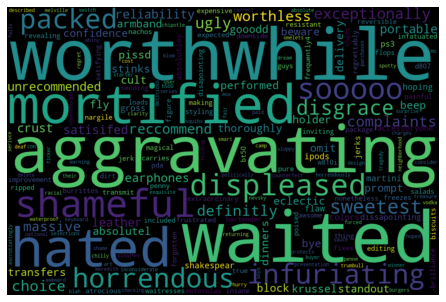

In [140]:
#Generate meaningful new data visualizations
keywords_all = shows_topN_from_vector(feature_names,sorted_items, document_matrix.shape[1])
wordCloud(keywords_all)


In [141]:
#Implement a simple Naive Bayes classifier that automatically classifies the records into their categories
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

count_vect = CountVectorizer()
tf_features = count_vect.fit_transform(df_newdata['Sentences'])  
tf_features.shape

(2983, 5155)

In [142]:
#Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(np.array(tf_features.todense()), df_newdata['Scores'].values, test_size=0.3, random_state=1)
NBmodel = MultinomialNB().fit(X_train, y_train)

y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.9464
Testing Accuracy : 0.8324


------------------------------------------------------------------------------------------------------------------

Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

If we want to know how many missing value in the dataframe, in order to use check_missing_values function that runs for loop to check one by one, we can simply use isnull().sum().

In [151]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [152]:
X.isnull().sum()

text             0
category         0
category_name    0
dtype: int64

Here we got the same answer, similarly, we can also use in duplicated function.